In [37]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('fivethirtyeight')


In [38]:
df = pd.read_csv('ALGO-USD.csv')

In [39]:
df=df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-01,0.208520,0.218198,0.207699,0.214370,0.214370,19987708.0
1,2020-07-02,0.214368,0.217793,0.203937,0.207202,0.207202,24088543.0
2,2020-07-03,0.207124,0.208019,0.203200,0.203974,0.203974,18788671.0
3,2020-07-04,0.203936,0.217720,0.203591,0.217210,0.217210,22962550.0
4,2020-07-05,0.217301,0.219258,0.209796,0.215142,0.215142,21720266.0
...,...,...,...,...,...,...,...
725,2022-06-26,0.351030,0.358990,0.332227,0.332298,0.332298,77802998.0
726,2022-06-27,0.332284,0.345222,0.325759,0.329622,0.329622,74703461.0
727,2022-06-28,0.329591,0.336814,0.311303,0.312360,0.312360,80242787.0
728,2022-06-29,0.312429,0.316256,0.295999,0.298932,0.298932,89771813.0


In [40]:
df.shape

(590, 7)

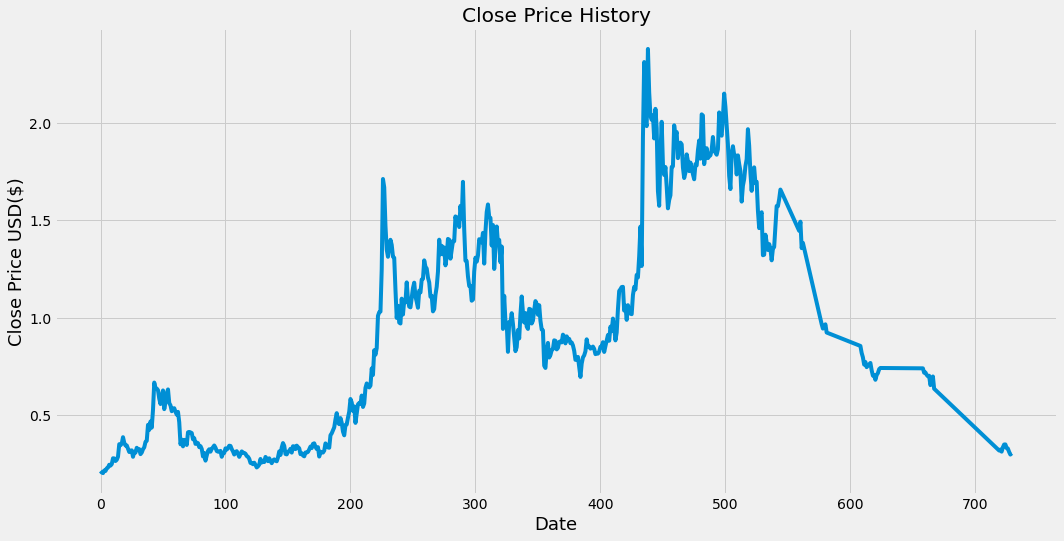

In [41]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [42]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00477866],
       [0.00148379],
       [0.        ],
       [0.0060841 ],
       [0.00513352],
       [0.01129209],
       [0.01311051],
       [0.01971725],
       [0.01772002],
       [0.02113072],
       [0.03489257],
       [0.03455518],
       [0.0284674 ],
       [0.03139867],
       [0.03863837],
       [0.06815242],
       [0.06566978],
       [0.06942247],
       [0.08468237],
       [0.07158564],
       [0.06500786],
       [0.06532503],
       [0.05733011],
       [0.04961512],
       [0.05293159],
       [0.05358432],
       [0.03837038],
       [0.05024808],
       [0.04820947],
       [0.05964543],
       [0.0557884 ],
       [0.05634505],
       [0.04469029],
       [0.04856709],
       [0.0562568 ],
       [0.06078402],
       [0.07354795],
       [0.07625077],
       [0.11371469],
       [0.10183056],
       [0.12159746],
       [0.10730653],
       [0.14913496],
       [0.21342529],
       [0.19978708],
       [0.19923043],
       [0.19556048],
       [0.175

In [43]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

 
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.00477866, 0.00148379, 0.        , 0.0060841 , 0.00513352,
       0.01129209, 0.01311051, 0.01971725, 0.01772002, 0.02113072,
       0.03489257, 0.03455518, 0.0284674 , 0.03139867, 0.03863837,
       0.06815242, 0.06566978, 0.06942247, 0.08468237, 0.07158564,
       0.06500786, 0.06532503, 0.05733011, 0.04961512, 0.05293159,
       0.05358432, 0.03837038, 0.05024808, 0.04820947, 0.05964543,
       0.0557884 , 0.05634505, 0.04469029, 0.04856709, 0.0562568 ,
       0.06078402, 0.07354795, 0.07625077, 0.11371469, 0.10183056,
       0.12159746, 0.10730653, 0.14913496, 0.21342529, 0.19978708,
       0.19923043, 0.19556048, 0.17554996, 0.16280121, 0.18102547,
       0.19482778, 0.15079618, 0.16740933, 0.18826655, 0.19730123,
       0.16527098, 0.15957851, 0.14590261, 0.15226067, 0.1529281 ])]
[0.14466887243703302]



In [44]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(412, 60)

In [45]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(412, 60, 1)

In [46]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [47]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [63]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

412/412 [==============================] - 22s 54ms/step - loss: 0.0055


In [68]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
x_test

[array([0.31291617, 0.33134682, 0.38635793, 0.42941274, 0.43351937,
        0.43860647, 0.43913968, 0.38320234, 0.39489939, 0.36128744,
        0.39583113, 0.38281761, 0.37579717, 0.37463284, 0.41967892,
        0.43892363, 0.4329618 , 0.46737127, 0.46130969, 0.5114663 ,
        0.58099863, 0.48829698, 0.79051724, 0.96909593, 0.82767825,
        0.81813656, 1.        , 0.89781182, 0.84270372, 0.83288577,
        0.84363913, 0.78900771, 0.85875976, 0.81336434, 0.66490554,
        0.63014352, 0.75299723, 0.82820594, 0.72843513, 0.70284017,
        0.7215149 , 0.67580094, 0.62421018, 0.64403408, 0.65484582,
        0.72182012, 0.72327679, 0.81989523, 0.7948059 , 0.80412649,
        0.74258219, 0.77419368, 0.77923159, 0.77523804, 0.72051238,
        0.69572366, 0.7083074 , 0.75141553, 0.73554428, 0.71200447]),
 array([0.33134682, 0.38635793, 0.42941274, 0.43351937, 0.43860647,
        0.43913968, 0.38320234, 0.39489939, 0.36128744, 0.39583113,
        0.38281761, 0.37579717, 0.37463284, 0.

In [69]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.31291617],
        [0.33134682],
        [0.38635793],
        ...,
        [0.75141553],
        [0.73554428],
        [0.71200447]],

       [[0.33134682],
        [0.38635793],
        [0.42941274],
        ...,
        [0.73554428],
        [0.71200447],
        [0.73214461]],

       [[0.38635793],
        [0.42941274],
        [0.43351937],
        ...,
        [0.71200447],
        [0.73214461],
        [0.71899135]],

       ...,

       [[0.5775654 ],
        [0.60781446],
        [0.61504128],
        ...,
        [0.06764128],
        [0.05898582],
        [0.05775576]],

       [[0.60781446],
        [0.61504128],
        [0.51363867],
        ...,
        [0.05898582],
        [0.05775576],
        [0.04982105]],

       [[0.61504128],
        [0.51363867],
        [0.51477036],
        ...,
        [0.05775576],
        [0.04982105],
        [0.0436487 ]]])

In [59]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


4/4 [==============================] - 0s 33ms/step


In [60]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

0.2983068069674511

C:\Users\teddy\AppData\Local\Temp\ipykernel_19508\1893841253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


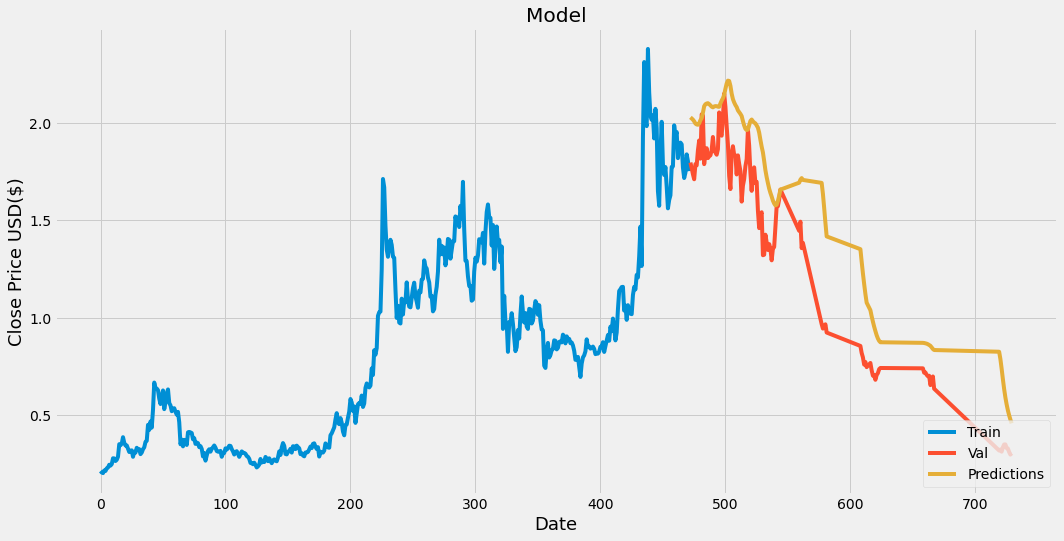

In [61]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [62]:
#show the valid and predicted prices
valid

,Close,Predictions
472,1.796759,2.028527
473,1.768144,2.022926
474,1.736743,2.016787
475,1.711154,2.008190
476,1.788533,1.996811
...,...,...
725,0.332298,0.556280
726,0.329622,0.525873
727,0.312360,0.500625
728,0.298932,0.478752


In [72]:

model.predict([[[0.208520 ], [0.218198],[0.2076993]]])

1/1 [==============================] - 0s 76ms/step


array([[0.15463139]], dtype=float32)

In [ ]:
	0.208520	0.218198	0.207699